[![Run Jupyter Notebooks](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/RichardPotthoff/Climate/main?filepath=Climate.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RichardPotthoff/Climate/blob/master/Climate.ipynb)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Constants" data-toc-modified-id="Constants-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Black-Body" data-toc-modified-id="Black-Body-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Black Body</a></span><ul class="toc-item"><li><span><a href="#Solar-irradiance" data-toc-modified-id="Solar-irradiance-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Solar irradiance</a></span></li><li><span><a href="#Estimated-daily-temperature-variation-based-on-solar-irradiance-and-heat-capacity-of-atmosphere" data-toc-modified-id="Estimated-daily-temperature-variation-based-on-solar-irradiance-and-heat-capacity-of-atmosphere-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Estimated daily temperature variation based on solar irradiance and heat capacity of atmosphere</a></span></li><li><span><a href="#Temperature-of-black-body-and-grey-body-sphere-at-1-au-distance-from-sun" data-toc-modified-id="Temperature-of-black-body-and-grey-body-sphere-at-1-au-distance-from-sun-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Temperature of black-body and grey-body sphere at 1 au distance from sun</a></span></li></ul></li><li><span><a href="#Rotating-planet-(sun-over-equator)" data-toc-modified-id="Rotating-planet-(sun-over-equator)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Rotating planet (sun over equator)</a></span><ul class="toc-item"><li><span><a href="#Temperature-as-function-of-latitude" data-toc-modified-id="Temperature-as-function-of-latitude-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Temperature as function of latitude</a></span></li><li><span><a href="#Average-temperature-for-a-rotating-planet" data-toc-modified-id="Average-temperature-for-a-rotating-planet-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Average temperature for a rotating planet</a></span></li></ul></li><li><span><a href="#Tidally-locked-planet-(or-sun-over-pole)" data-toc-modified-id="Tidally-locked-planet-(or-sun-over-pole)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tidally locked planet (or sun over pole)</a></span><ul class="toc-item"><li><span><a href="#Temperature-as-function-of-latitude-for-a-tidally-locked-planet" data-toc-modified-id="Temperature-as-function-of-latitude-for-a-tidally-locked-planet-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Temperature as function of latitude for a tidally locked planet</a></span></li><li><span><a href="#Average-temperature-for-a-tidally-locked-planet" data-toc-modified-id="Average-temperature-for-a-tidally-locked-planet-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Average temperature for a tidally locked planet</a></span></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#Side-by-side-comparison-of-temperature-maps-for-a-tidally-locked-and-a-rotating-planet" data-toc-modified-id="Side-by-side-comparison-of-temperature-maps-for-a-tidally-locked-and-a-rotating-planet-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Side-by-side comparison of temperature maps for a tidally locked and a rotating planet</a></span></li><li><span><a href="#NASA-image-of-earth" data-toc-modified-id="NASA-image-of-earth-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>NASA image of earth</a></span></li><li><span><a href="#Image-of-the-Chimborazo" data-toc-modified-id="Image-of-the-Chimborazo-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Image of the Chimborazo</a></span></li></ul></li></ul></div>

In [1]:
#load missing required files from GitHub, so the Notebook can be run in Google colab
def wget(url,local_path='./'):
  filename=url.rsplit('/',1)[-1]
  import os
  if not os.path.exists(local_path+filename):
    import urllib3
    import certifi
    http=urllib3.PoolManager( cert_reqs='CERT_REQUIRED', ca_certs=certifi.where())
    with http.request('GET',url,preload_content=False) as r:
      with open(local_path+filename,'wb') as f:
        print(f'Downloading file: {url}')
        print(f'Saving file: {local_path}{filename}')
        f.write(r.read())
  else:
    print(f'"{local_path}{filename}" already exists. No need to download.')
for filename in ('mollweide.py','fqs.py','IMG_0097.AVIF','IMG_0099.WEBP'):
  wget('https://raw.githubusercontent.com/RichardPotthoff/Climate/main/'+filename)

"./mollweide.py" already exists. No need to download.
"./fqs.py" already exists. No need to download.
"./IMG_0097.AVIF" already exists. No need to download.
"./IMG_0099.WEBP" already exists. No need to download.


# Constants

In [2]:
import numpy as np
from numpy import pi,sin,cos, arccos as acos, arcsin as asin
from matplotlib import pyplot as plt , cm as cmap 
au=149_597_870_700 # [m] (by definition) astronomical unit: distance sun<->earth
r_sun=695_700_000 # [m] radius of the sun
T_sun=5_772.0 # [K] surface temperature of the sun
r_earth=6_378_100 # [m] radius of the earth at equator
g_earth=9.80665 # [m/s^2] acceleration due to gravity on earth
cp_air=1005 # [J/(kg K)] specific heat capacity at constant pressure for dry air @15°C
deg=pi/180 # 1 angle degree in radians (conversion factor)
atm=101325 # [Pa] atmospheric pressure
day=24*3600 # [s] length if day in seconds
σ_SB=5.67037442e-8 # [J/(m^2 K^4)] Stefan-Boltzmann constant
print(f'{r_sun=:7.3e}m, {T_sun=}K, {au=:7.3e}m')

r_sun=6.957e+08m, T_sun=5772.0K, au=1.496e+11m


# Black Body
## Solar irradiance

$$\dot q_{\rm au}=\sigma_\text{S-B}\cdot T_{\rm sun}^4\cdot\left(\frac{r_{\rm sun}}{1\cdot{\rm au}}\right)^2$$

In [3]:
q_au=σ_SB*T_sun**4*(r_sun/(1*au))**2
print(f'{q_au=:0.0f}W/m^2') 

q_au=1361W/m^2


In [4]:
cp_atmosphere=cp_air*1*atm/g_earth
print(f'{cp_atmosphere=:0.3e}J/(m^2 K)')

cp_atmosphere=1.038e+07J/(m^2 K)


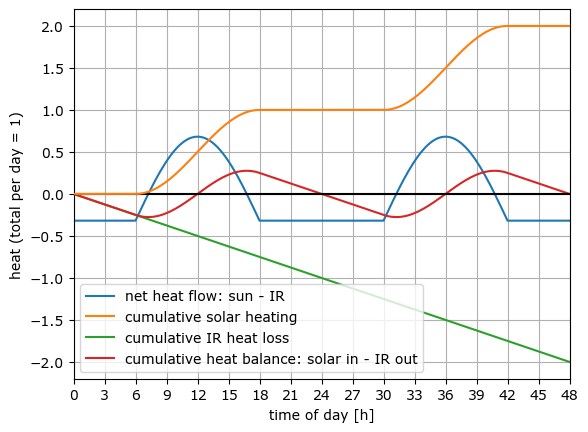

In [5]:
def Qsun(t):
  i,r=np.divmod(t+6,24)
  return i + (r>12)* 0.5*(1+cos(r*(pi/12)))
tod=np.linspace(0,48,201)
solrad=np.maximum(cos((tod-12)/24*2*pi),0)
plt.plot(tod,solrad-1/pi,label="net heat flow: sun - IR")
plt.plot(tod,Qsun(tod),zorder=20,label="cumulative solar heating")
plt.plot((0,48),(0,-2),label="cumulative IR heat loss")
plt.plot(tod,Qsun(tod)-tod/24,label="cumulative heat balance: solar in - IR out")
plt.plot((0,48),(0,0),'k',zorder=10)
plt.grid()
plt.xlim((0,48))
plt.xticks(range(0,49,3))
plt.xlabel("time of day [h]")
plt.ylabel("heat (total per day = 1)")
plt.legend()
plt.show()

## Estimated daily temperature variation based on solar irradiance and heat capacity of atmosphere

In [6]:
def dT_dt(phi):
    return q_au*cos(phi)/(cp_atmosphere*pi)
af=sin(acos(1/pi))-acos(1/pi)*1/pi
print(f'{af=}')

for lat in (0,30,40,50,60,70):
  print(f'{lat=:2.0f}: {dT_dt(lat*deg)*day = :0.2f}K/day (ΔT={dT_dt(lat*deg)*day*af:0.2f}K with simultaneous cooling)')

af=0.5511019658223668
lat= 0: dT_dt(lat*deg)*day = 3.61K/day (ΔT=1.99K with simultaneous cooling)
lat=30: dT_dt(lat*deg)*day = 3.12K/day (ΔT=1.72K with simultaneous cooling)
lat=40: dT_dt(lat*deg)*day = 2.76K/day (ΔT=1.52K with simultaneous cooling)
lat=50: dT_dt(lat*deg)*day = 2.32K/day (ΔT=1.28K with simultaneous cooling)
lat=60: dT_dt(lat*deg)*day = 1.80K/day (ΔT=0.99K with simultaneous cooling)
lat=70: dT_dt(lat*deg)*day = 1.23K/day (ΔT=0.68K with simultaneous cooling)


## Temperature of black-body and grey-body sphere at 1 au distance from sun

$$T_{\rm BB} = T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{2.5pt}]{\frac{r_{\rm sun}^2}{{(1 \cdot \rm{au})}^2}\cdot\frac{\pi\cdot r_{\rm earth}^2}{4\cdot\pi\cdot r_{\rm earth}^2}}=T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{2.5pt}]{\frac{r_{\rm sun}^2}{{(1 \cdot \rm{au})}^2}\cdot\frac{1}{4}}$$

$$T_{\rm GB} = T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{2.5pt}]{\frac{r_{\rm sun}^2}{{(1 \cdot \rm{au})}^2}\cdot\frac{(1-\alpha_{\rm cloud})\cdot\pi\cdot r_{\rm earth}^2}{(1-\alpha_{\rm cloud})\cdot4\cdot\pi\cdot r_{\rm earth}^2}}=T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{2.5pt}]{\frac{r_{\rm sun}^2}{{(1 \cdot \rm{au})}^2}\cdot\frac{1}{4}}$$

In [7]:
T_BB = T_GB =T_sun * (r_sun**2/(1*au)**2 * (1/4))**(1/4)
print(f'T_BB = T_GB = {T_BB:0.2f}K = {T_BB-273.15:0.2f}°C')

T_BB = T_GB = 278.33K = 5.18°C


# Rotating planet (sun over equator)
## Temperature as function of latitude

$$T_{\rm rot}(\phi) = T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{3pt}]{\frac{r_\rm{sun}^2}{{(1 \cdot \rm{au})}^2}\cdot\frac{{\rm cos}(\phi)}{\pi}}$$

In [8]:
def T_rot(phi):
    return T_sun * (r_sun**2/(1*au)**2 * (cos(phi)/pi))**(1/4)

In [9]:
from mollweide import x_y2lat_lon,lat_lon2x_y
def color_bar(ax):
 ax.set_xticks([])
 ax.yaxis.tick_right()
 ax.set_yticks([0,1/3,2/3,1],labels=['-50°C','  0°C',' 50°C','100°C'])
 ax.contourf(np.ones((1,2))*[[-50+273.15],[100+273.15]], \
             cmap=cmap.jet,levels=100,vmin=220,vmax=220+150)
def circle(r=1,Rx=None,Ry=None,tol=0.2):
  if Rx==None: Rx=r
  if Ry==None: Ry=r
  n=max(5,int(pi/(2*tol/max(Rx,Ry))**0.5)+1)
  phi=np.linspace(-pi,pi,n+1)
  return (Rx*cos(phi),Ry*sin(phi))
R=140
def moll(ax,T_phi):
  ax.set_xticks([2*R*lon/180 for lon in range(-180,181,30)],\
                     labels=[f'{lon:0.0f}' for lon in range(-180,181,30)]) 
  ax.set_yticks([R*lat_lon2x_y(lat/180*pi,0)[1] for lat in range(-90,91,30)],\
                     labels=[f'{lat:0.0f}' for lat in range(-90,91,30)]) 
  for lon in range(-180,1,30):
    ax.plot(*circle(R,Rx=2*R*lon/180,tol=0.2),'k',zorder=20)
  ax.plot(*circle(1.01*R,Rx=1.01*2*R,tol=0.2),'white',lw=4,zorder=15)
  for lat in range(0,90,30):
    x,y=lat_lon2x_y(lat/180*pi,pi,R=R)
    ax.plot((-x,x),(y,y),'k',zorder=20)
    ax.plot((-x,x),(-y,-y),'k',zorder=20)
  for y in range(-R,R,2):
    lat,lon=x_y2lat_lon(0,y,R=R) 
    x,_=lat_lon2x_y(lat,-pi,R=R)
    ax.plot((-x,x),(y,y),color=cmap.jet((T_phi(lat)-220)/150),lw=2.6,zorder=10)
  ax.set_title(f'Mollweide projection for "{T_phi.__name__}"')


In [10]:
for phi in reversed([0,10,20,30,40,50,60]): 
 print(f'T_rot({phi:2.0f}°Lat) = {T_rot(phi*deg):0.2f}K, ={T_rot(phi*deg)-273.15:7.2f}°C')

T_rot(60°Lat) = 248.62K, = -24.53°C
T_rot(50°Lat) = 264.73K, =  -8.42°C
T_rot(40°Lat) = 276.60K, =   3.45°C
T_rot(30°Lat) = 285.21K, =  12.06°C
T_rot(20°Lat) = 291.09K, =  17.94°C
T_rot(10°Lat) = 294.53K, =  21.38°C
T_rot( 0°Lat) = 295.66K, =  22.51°C


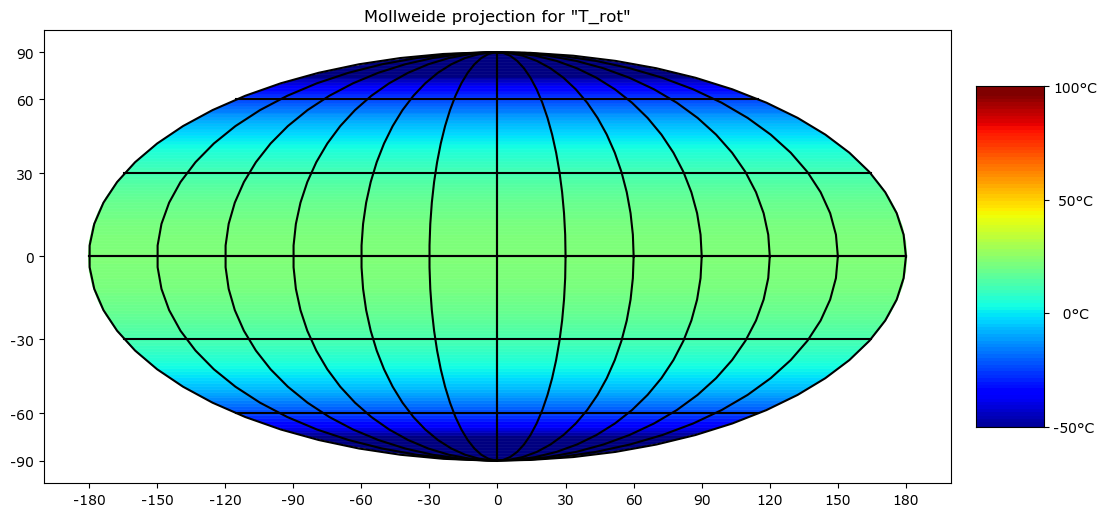

In [11]:
fig,(ax,cb)=plt.subplots(1,2,figsize=(10,17.5),\
  gridspec_kw=dict(wspace=0.05,left=0,right=1,top=0.7,width_ratios=[2,0.15]))
ax.set_aspect('equal')
moll(ax,T_rot)
cb.set_aspect(5.0)
color_bar(cb)

## Average temperature for a rotating planet

$$\overline{T_{\rm rot}}=T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{3pt}]{\frac{r_\rm{sun}^2}{{(1 \cdot \rm{au})}^2}}\cdot\frac{\int_{-\frac \pi 2}^\frac \pi 2 \frac{\cos(\phi)^\frac 1 4}{\pi} \cdot \cos(\phi) \enspace {\rm d} \phi}{\int_{-\frac\pi 2}^\frac{\pi}{2} \cos(\phi)\enspace{\rm d}\phi}=T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{3pt}]{\frac{r_\rm{sun}^2}{{(1 \cdot \rm{au})}^2}}\cdot{-\frac{4\cdot\sqrt[\Large 4 \hspace{2pt}]\pi\cdot\Gamma(\frac 1 8)}{15\cdot\Gamma({-\frac 3 8})}}$$ 

In [12]:
from math import gamma
T_rot_avg=T_sun * (r_sun**2/(1*au)**2)**(1/4)*-4/15*pi**(1/4)*gamma(1/8)/gamma(-3/8)
print(f'T_rot_avg = {T_rot_avg:0.2f}K = {T_rot_avg-273.15:0.2f}°C')

T_rot_avg = 275.22K = 2.07°C


# Tidally locked planet (or sun over pole)
## Temperature as function of latitude for a tidally locked planet

$$T_{\rm pol}(\phi) = T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{3pt}]{\frac{r_\rm{sun}^2}{{(1 \cdot \rm{au})}^2}\cdot\frac{\sin(\phi)}{1}}$$

In [13]:
def T_pol(phi):
    return 0 if phi<0 else T_sun * (r_sun**2/(1*au)**2 * (sin(phi)/1))**(1/4)
for phi in [90,80,70,60,50,40,30,20,10,0,-10]: 
 print(f'T_rot({phi:3.0f}°Lat) ={T_pol(phi*deg):7.2f}K ={T_pol(phi*deg)-273.15:7.2f}°C')

T_rot( 90°Lat) = 393.62K = 120.47°C
T_rot( 80°Lat) = 392.11K = 118.96°C
T_rot( 70°Lat) = 387.54K = 114.39°C
T_rot( 60°Lat) = 379.71K = 106.56°C
T_rot( 50°Lat) = 368.25K =  95.10°C
T_rot( 40°Lat) = 352.45K =  79.30°C
T_rot( 30°Lat) = 330.99K =  57.84°C
T_rot( 20°Lat) = 301.01K =  27.86°C
T_rot( 10°Lat) = 254.09K = -19.06°C
T_rot(  0°Lat) =   0.00K =-273.15°C
T_rot(-10°Lat) =   0.00K =-273.15°C


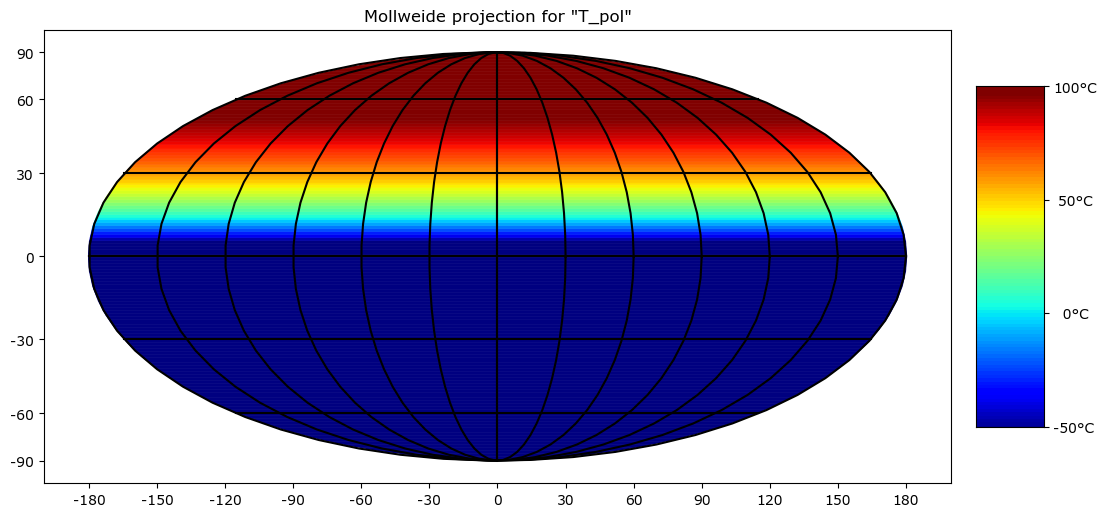

In [14]:
fig,(ax,cb)=plt.subplots(1,2,figsize=(10,17.5),\
  gridspec_kw=dict(wspace=0.05,left=0,right=1,top=0.7,width_ratios=[2,0.15]))
ax.set_aspect('equal')
moll(ax,T_pol)
cb.set_aspect(5.0)
color_bar(cb)

## Average temperature for a tidally locked planet

$$\overline{T_{\rm pol}}=T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{3pt}]{\frac{r_\rm{sun}^2}{{(1 \cdot \rm{au})}^2}}\cdot\frac{\int_0^\frac \pi 2 \frac{\sin(\phi)^\frac 1 4}{1} \cdot \cos(\phi) \enspace {\rm d} \phi}{\int_{-\frac\pi 2}^\frac{\pi}{2} \cos(\phi)\enspace{\rm d}\phi}=T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{3pt}]{\frac{r_\rm{sun}^2}{{(1 \cdot \rm{au})}^2}}\cdot\frac 2 5$$ 

In [15]:
T_pol_avg=T_sun * (r_sun**2/(1*au)**2)**(1/4)*2/5
print(f'T_pol_avg = {T_pol_avg:0.2f}K = {T_pol_avg-273.15:0.2f}°C')

T_pol_avg = 157.45K = -115.70°C


# Appendix
## Side-by-side comparison of temperature maps for a tidally locked and a rotating planet

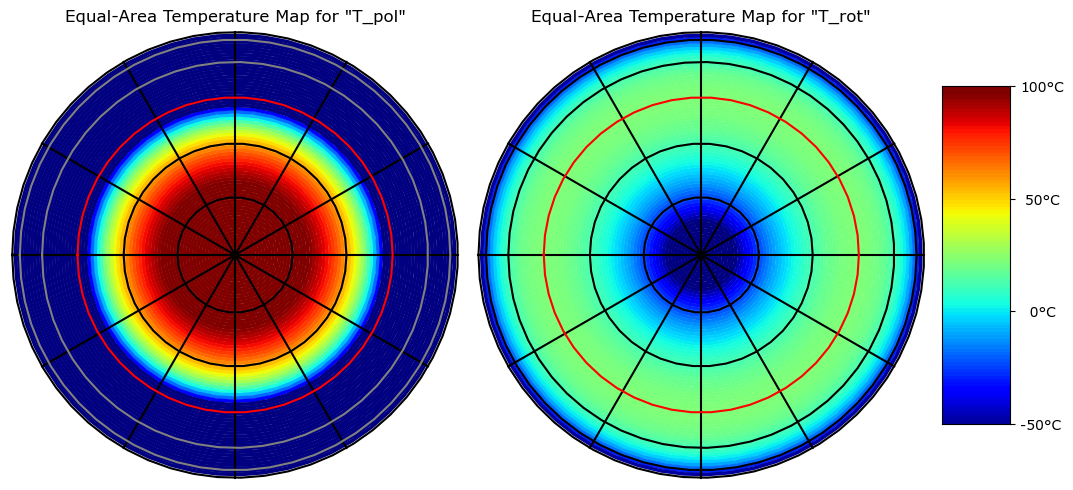

In [16]:
def circle(r=1,Rx=None,Ry=None,tol=0.2):
  if Rx==None: Rx=r
  if Ry==None: Ry=r
  n=max(5,int(pi/(2*tol/max(Rx,Ry))**0.5)+1)
  phi=np.linspace(-pi,pi,n+1)
  return (Rx*cos(phi),Ry*sin(phi))

def flat_earth(ax,T_phi):
  ax.set_aspect('equal')
  ax.set_axis_off()
  R=140
  ax.set_xlim(-R*1.01,R*1.01)
  ax.set_ylim(-R*1.01,R*1.01)
  for lon in range(0,180,30):
    ax.plot((-R*cos(lon*deg),R*cos(lon*deg)),(-R*sin(lon*deg),R*sin(lon*deg)), \
           'k',zorder=10)
  for lat30 in range(-90,89,30):
    ax.plot(*circle(R/2*(2-2*sin(lat30*deg))**0.5,tol=0.2), \
         'r' if lat30==0 else  'k' if T_phi(lat30*deg)>100 or lat30== -90  else 'gray' ,zorder=10)
  for r in range(2,R,2):
    phi=asin(1-(r/(R/2**0.5))**2)
    ax.plot(*circle(r,tol=0.2), \
         color=cmap.jet((T_phi(phi)-220)/150),lw=2.6,zorder=5)
  ax.set_title(f'Equal-Area Temperature Map for "{T_phi.__name__}"')
plt.close()
fig,axes=plt.subplots(1,3,figsize=(10.0,9.0),\
        gridspec_kw=dict(wspace=0.05,left=0,right=1,top=0.7,width_ratios=[1,1,0.15]))
flat_earth(axes[0],T_pol)
flat_earth(axes[1],T_rot)
axes[2].set_aspect(5.0)
color_bar(axes[2])
plt.show()

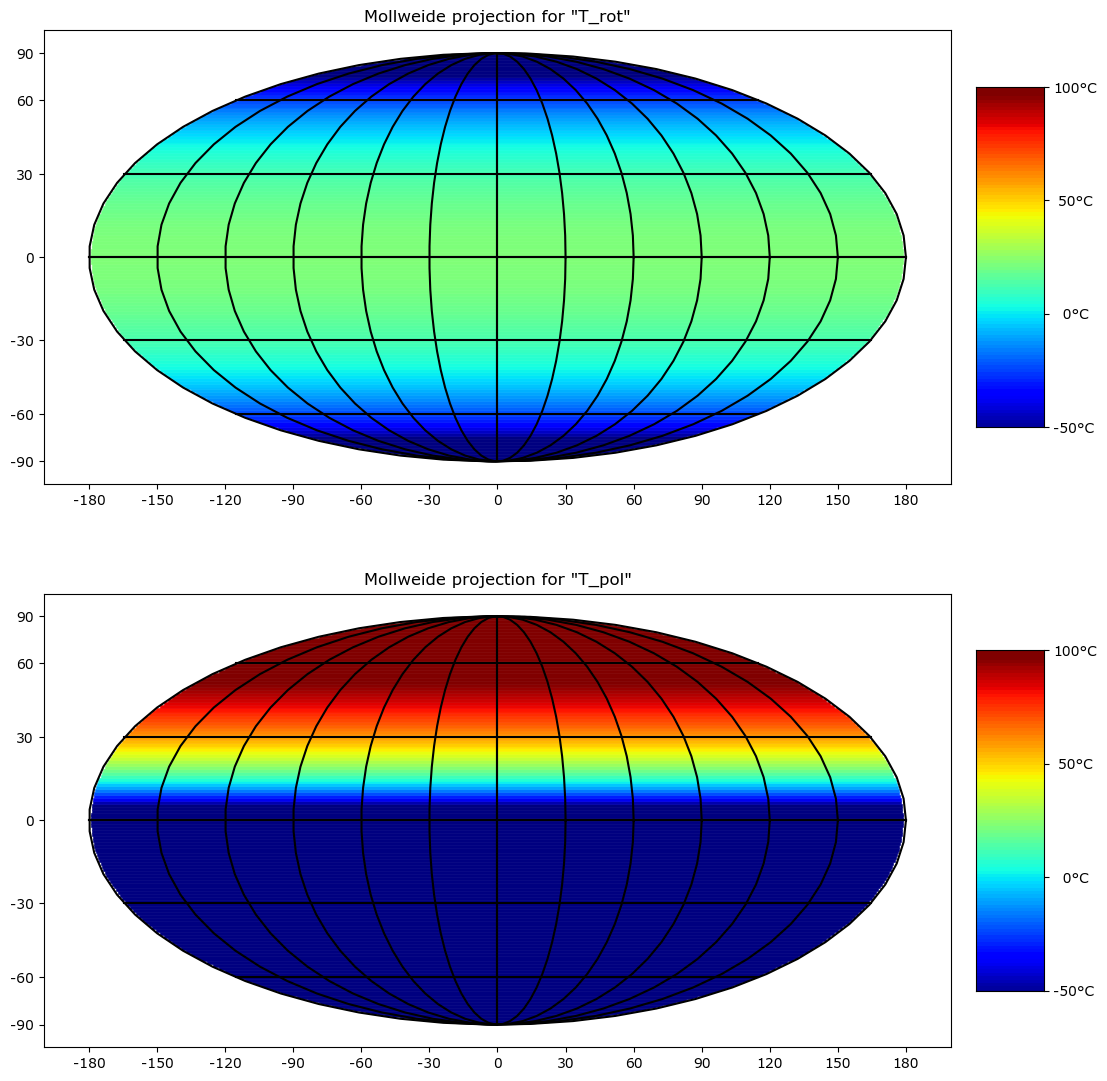

In [17]:
from mollweide import x_y2lat_lon,lat_lon2x_y
R=140
def moll(ax,T_phi):
  ax.set_xticks([2*R*lon/180 for lon in range(-180,181,30)],\
                     labels=[f'{lon:0.0f}' for lon in range(-180,181,30)]) 
  ax.set_yticks([R*lat_lon2x_y(lat/180*pi,0)[1] for lat in range(-90,91,30)],\
                     labels=[f'{lat:0.0f}' for lat in range(-90,91,30)]) 
  for lon in range(-180,1,30):
    ax.plot(*circle(R,Rx=2*R*lon/180,tol=0.2),'k',zorder=20)
  ax.plot(*circle(1.01*R,Rx=1.01*2*R,tol=0.2),'white',lw=4,zorder=15)
  for lat in range(0,90,30):
    x,y=lat_lon2x_y(lat/180*pi,pi,R=R)
    ax.plot((-x,x),(y,y),'k',zorder=20)
    ax.plot((-x,x),(-y,-y),'k',zorder=20)
  for y in range(-R,R,2):
    lat,lon=x_y2lat_lon(0,y,R=R) 
    x,_=lat_lon2x_y(lat,-0.99*pi,R=R)
    ax.plot((-x,x),(y,y),color=cmap.jet((T_phi(lat)-220)/150),lw=2.6,zorder=10)
  ax.set_title(f'Mollweide projection for "{T_phi.__name__}"')
fig,((ax0,cb0),(ax1,cb1))=plt.subplots(2,2,figsize=(10,17.5),\
  gridspec_kw=dict(wspace=0.05,left=0,right=1,top=0.7,width_ratios=[2,0.15]))
ax0.set_aspect('equal')
moll(ax0,T_rot)
ax1.set_aspect('equal')
moll(ax1,T_pol)
cb0.set_aspect(5.0)
color_bar(cb0)
cb1.set_aspect(5.0)
color_bar(cb1)

## NASA image of earth

 ![IMG_0097.AVIF](./IMG_0097.AVIF)

## Image of the Chimborazo 

 ![Chimborazo](./IMG_0099.WEBP)